### Schrödinger 방정식 풀어 보기 (+ numpy 써보기)
시간-무관 Schrödinger 방정식 $\hat{H}\psi = E\psi$에 대한 eigenfunction $\psi$를 구해 봅시다.

Hamiltonian $\hat{H}$는 kinetic energy operator $\hat{T}$와 potential energy operator $\hat{V}$에 대해 다음과 같이 나타낼 수 있습니다: $$\hat{H} = \hat{T} + \hat{V} = \frac{\hat{p}^2}{2m} + \hat{V} = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + \hat{V}$$

컴퓨터를 통해 Schrödinger 방정식과 같은 미분 방정식의 수치적인 해를 구하는 방법으로 유한차분법(finite difference method)이 있습니다. 유한차분법을 통해 기하학적인 영역 내에 유한개의 점들을 생성하면, 미분 방정식을 행렬 방정식으로 전환할 수 있습니다. 

먼저, 행렬 및 그와 연관된 계산(특히 적분)을 다루기 위해 필요한 라이브러리인 `numpy` 및 `scipy.integrate` 라이브러리를 import 합니다.
그래프를 그리기 위해서는 `matplotlib.pyplot`을 import 해야 합니다.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

유한차분법을 시행하기 위해 grid를 만들어야 합니다. `np.linspace` 또는 `np.arange` 함수를 사용하여 만들 수 있습니다.

In [2]:
x = np.linspace(-1, 1, 1000)

그리고 위치 `x`에 따른 potential energy를 반환하는 함수를 만들어 봅시다.

여기서는 0을 중심으로 거리 `r` 만큼 떨어진 두 개의 1차원 coulomb well을 potential로 사용해 볼 것입니다.

In [3]:
def potential(x, r=0.2):
    return -1/np.abs(x-r/2)-1/np.abs(x+r/2)

이제 Hamiltonian을 행렬으로 표현해 볼 것입니다. 유한 차분법에서

$$
\displaystyle
\frac{\partial^2 f_i}{\partial x^2} = \begin{cases}
\displaystyle\frac{f_{i+1}-2f_i+f_{i-1}}{(\Delta x)^2} &\text{ if} & 0<i<n-1 \\
\displaystyle\frac{f_{i+1}-2f_{i}}{ (\Delta x)^2} &\text{ if} & i=0\\
\displaystyle\frac{-2f_i+ f_{i+1}}{(\Delta x)^2} &\text{ if} & i=n-1
\end{cases}
$$

과 같이 나타낼 수 있습니다. 따라서 예로 grid의 길이가 `3`인 경우, $\hat{H}$는 다음과 같이 표현됩니다. 

$$
\hat{H} = \hat{T} + \hat{V} = \begin{pmatrix}
2t & -t & 0 \\
-t & 2t & -t \\
0 & -t & 2t \\
\end{pmatrix} + \begin{pmatrix}
V(x_0) & 0 & 0 \\
0 & V(x_1) & 0 \\
0 & 0 & V(x_2) \\
\end{pmatrix}
$$

($t = \hbar^2 / 2m(\Delta x)^2$, potential energy function $V(x)$에 대해 grid의 각 위치의 좌표가 $x_0, x_1, x_2$인 경우.)

In [4]:
def hamiltonian(x, potential, m=1, hbar=1):
    dx = x[1] - x[0]
    t = hbar**2 / (2*m*dx**2)
    T = np.diag([2*t]*len(x)) + np.diag([-t]*(len(x)-1), k=-1) + np.diag([t]*(len(x)-1), k=1)
    # T를 구성할 때 for문을 사용하는 것이 더 직관적일 수 있음
    V = np.diag(potential(x))
    return T + V

이제 grid 위에서 위와 같이 행렬로 정의된 Hamiltonian에 대해, 시간-무관 Schrödinger 방정식 $\hat{H}\psi = E\psi$ 는 행렬 $\hat{H}$에 대한 eigenvector를 찾는 문제가 됩니다. `numpy`에서 `np.linalg.eigh` 함수를 사용하면 Hermitian 행렬에 대한 eigenvalue들과 eigenvector들을 얻을 수 있습니다.

* 생각해보기: `np.linalg.eig` 함수가 있는데 왜 굳이 Hermitian 행렬에 특화된 `np.linalg.eigh` 함수를 따로 만들었을까요?

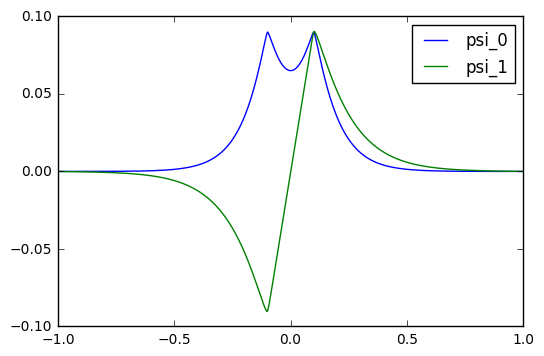

In [5]:
H = hamiltonian(x, potential)
_, eigenvectors = np.linalg.eigh(H) # eigenvalue는 일단 안 쓰이니까 제외

psi_0 = eigenvectors[:,0]
psi_1 = eigenvectors[:,1]

plt.plot(x, psi_0, label='psi_0')
plt.plot(x, psi_1, label='psi_1')
plt.legend()
plt.show()

이러한 eigenvector들은 normalize 되지 않은 상태입니다. 따라서 먼저 normalize 할 필요가 있습니다.

In [6]:
def pdf(psi): # pdf는 뒤에서 plot하기 위해 따로 함수를 만들었음
    return np.conjugate(psi) * psi

def normalize(x, psi):
    return psi / np.sqrt(simps(pdf(psi), x))

이제 최종적으로 normalize 된 eigenvector, 또는 파동함수를 얻을 수 있습니다. Probability density도 도시해 볼 수 있을 것입니다.

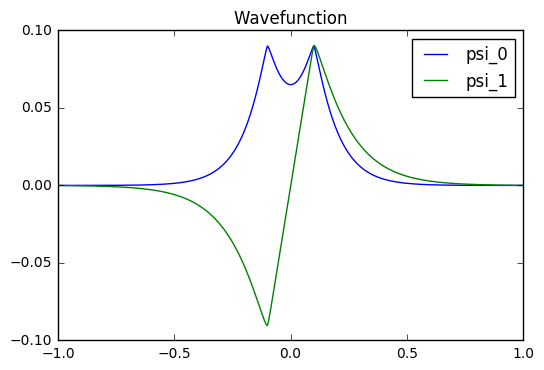

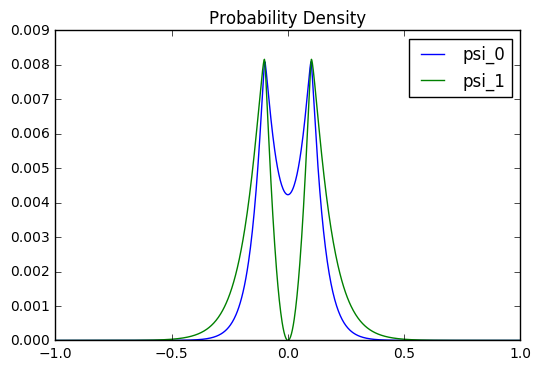

In [7]:
psi0 = normalize(x, psi_0)
psi1 = normalize(x, psi_1)

pdf_0 = pdf(psi_0)
pdf_1 = pdf(psi_1)

plt.plot(x, psi_0, label='psi_0')
plt.plot(x, psi_1, label='psi_1')
plt.title('Wavefunction')
plt.legend()
plt.show()

plt.plot(x, pdf_0, label='psi_0')
plt.plot(x, pdf_1, label='psi_1')
plt.title('Probability Density')
plt.legend()
plt.show()